In [1]:
!pip install pyLDAvis -qq
!pip install -qq -U gensim
!pip install spacy -qq
!pip install matplotlib -qq
!pip install seaborn -qq
!python -m spacy download en_core_web_md -qq

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [2]:
!pip install spacy
!python -m spacy download en_core_web_sm
!python -m spacy download en

     ---------------------------------------- 12.8/12.8 MB 5.2 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.5.0/en_core_web_sm-3.5.0-py3-none-any.whl (12.8 MB)
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
import spacy
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import spacy
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook
import en_core_web_md
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\ASUS\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\ASUS\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [5]:
# Data Collection

mitre = pd.read_csv(r'C:\Users\ASUS\Desktop\Capstone project\MITREtext.csv')
mitre.head()

,Unnamed: 0.1,Unnamed: 0,Target
0,2,2,Suspected COVID-19 Suspected COVID-19 Otitis m...
1,3,3,Suspected COVID-19 COVID-19 Otitis media Face ...
2,10,10,Suspected COVID-19 Suspected COVID-19 Fever (f...
3,11,11,Suspected COVID-19 COVID-19 Fever (finding) Fa...
4,14,14,Suspected COVID-19 Suspected COVID-19 Suspecte...


In [6]:
# Data Preprocessing using spaCy model
nlp = en_core_web_md.load()

In [7]:
# Tags that need to be removed
words_removed= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']
tokens = []
for description in nlp.pipe(mitre['Target']):
   proj_tok = [token.lemma_.lower() for token in description if token.pos_ not in words_removed and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)

In [8]:
#New column with stopwords removed
mitre['tokens'] = tokens

In [9]:
mitre['tokens']

0        [suspect, suspected, otitis, media, face, mask...
1        [suspect, otitis, media, face, mask, physical,...
2        [suspect, suspected, fever, find, face, mask, ...
3        [suspect, fever, find, face, mask, physical, o...
4        [suspect, suspected, suspected, face, mask, ph...
                               ...                        
51540    [suspect, concussion, loss, consciousness, bod...
51541    [suspect, concussion, loss, consciousness, str...
51542    [suspect, concussion, loss, consciousness, chr...
51543    [suspect, concussion, loss, consciousness, mis...
51544    [suspect, concussion, loss, consciousness, imp...
Name: tokens, Length: 51545, dtype: object

In [10]:
# Creating dictionary
dictionary = Dictionary(mitre['tokens'])

In [17]:
# Creating some random topics


topics = [ ['social distance','quarantine','covid'tests'],
           ['healthcare', 'medicine', 'doctor'],
           ['covid', 'covid-19', '2019-nCoV', 'coronavirus'],
           ['symptom', 'headache', 'body aches', 'cough', 'dead',],
           ['disease', 'positive', 'covid']
          ]

# Creating a dictionary with the vocabulary
word2id = Dictionary( mitre['tokens'] )

cm = CoherenceModel(topics=topics, 
                    texts= mitre['tokens'],
                    coherence='c_v',  
                    dictionary=word2id)

coherence_per_topic = cm.get_coherence_per_topic()

ValueError: unable to interpret topic as either a list of tokens or a list of ids

In [12]:
topics_str = [ '\n '.join(t) for t in topics ]
data_topic_score = pd.DataFrame( data=zip(topics_str, coherence_per_topic), columns=['Topic', 'Coherence'] )
data_topic_score = data_topic_score.set_index('Topic')

fig, ax = plt.subplots( figsize=(2,30) )
ax.set_title("Topics coherence\n $C_v$")
sns.heatmap(data=data_topic_score, annot=True, square=True,
            cmap='Reds', fmt='.2f',
            linecolor='black', ax=ax )
plt.yticks( rotation=0 )
ax.set_xlabel('')
ax.set_ylabel('')
fig.show()

NameError: name 'coherence_per_topic' is not defined

In [12]:
#Filtering low frequency and high frequency tokens
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

In [13]:
#Creating a corpus
corpus = [dictionary.doc2bow(doc) for doc in mitre['tokens']]

In [14]:
from gensim import models

In [15]:
# Model Building
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=25, num_topics=10, workers = 4, passes=10)

In [16]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [19]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

In [17]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=mitre['tokens']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=mitre['tokens'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20184\3345901879.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20184\3345901879.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1,0.9000,"suspect, physical, mask, object, face, type, f...","[suspect, suspected, otitis, media, face, mask..."
1,1,1,0.8875,"suspect, physical, mask, object, face, type, f...","[suspect, otitis, media, face, mask, physical,..."
2,2,1,0.9000,"suspect, physical, mask, object, face, type, f...","[suspect, suspected, fever, find, face, mask, ..."
3,3,1,0.8875,"suspect, physical, mask, object, face, type, f...","[suspect, fever, find, face, mask, physical, o..."
4,4,1,0.8875,"suspect, physical, mask, object, face, type, f...","[suspect, suspected, suspected, face, mask, ph..."
5,5,1,0.8714,"suspect, physical, mask, object, face, type, f...","[suspect, suspected, face, mask, physical, obj..."
6,6,1,0.8714,"suspect, physical, mask, object, face, type, f...","[suspect, suspected, face, mask, physical, obj..."
7,7,1,0.8500,"suspect, physical, mask, object, face, type, f...","[suspect, face, mask, physical, object]"
8,8,1,0.9100,"suspect, physical, mask, object, face, type, f...","[suspect, sprain, ankle, sprain, ankle, face, ..."
9,9,1,0.9000,"suspect, physical, mask, object, face, type, f...","[suspect, suspected, sprain, ankle, face, mask..."


C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_fo

C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_fo

C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_fo

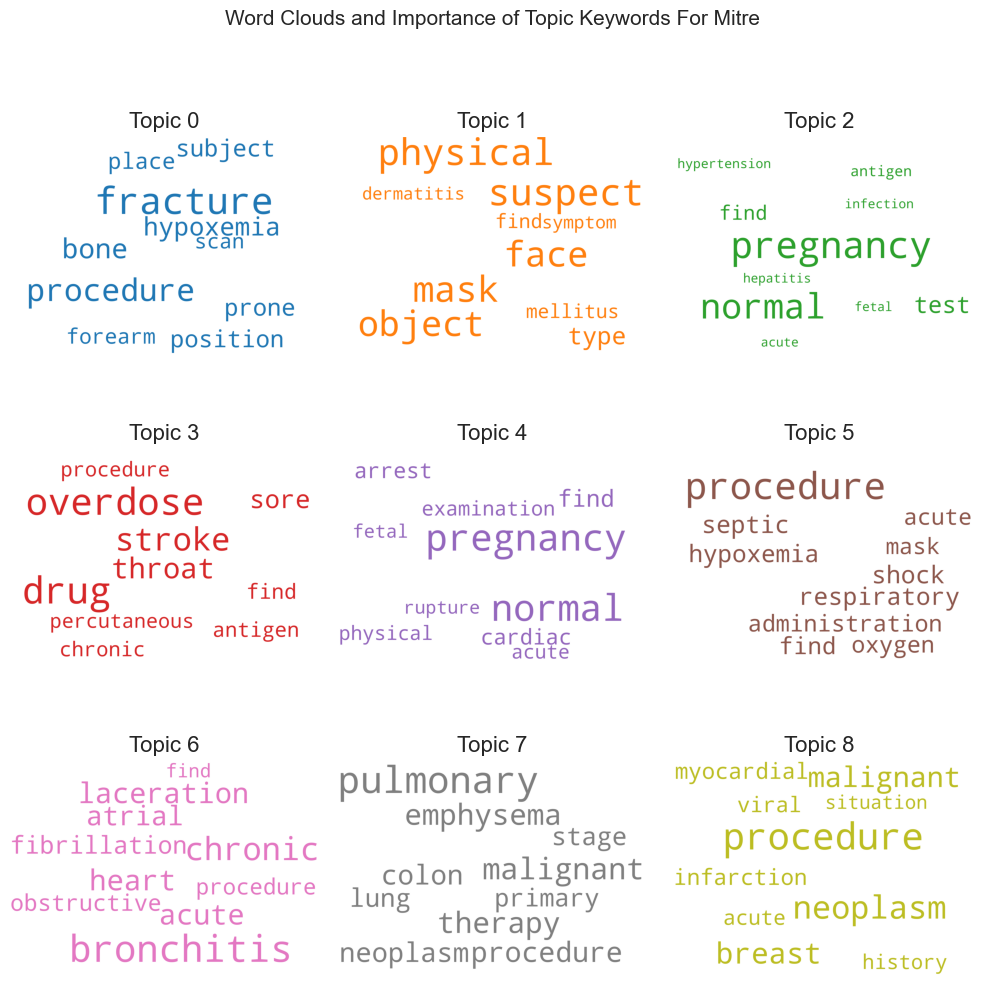

In [20]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.suptitle('Word Clouds and Importance of Topic Keywords For Mitre', fontsize=15, y=1.05) 
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20184\1453575362.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20184\1453575362.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20184\1453575362.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20184\1453575362.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20184

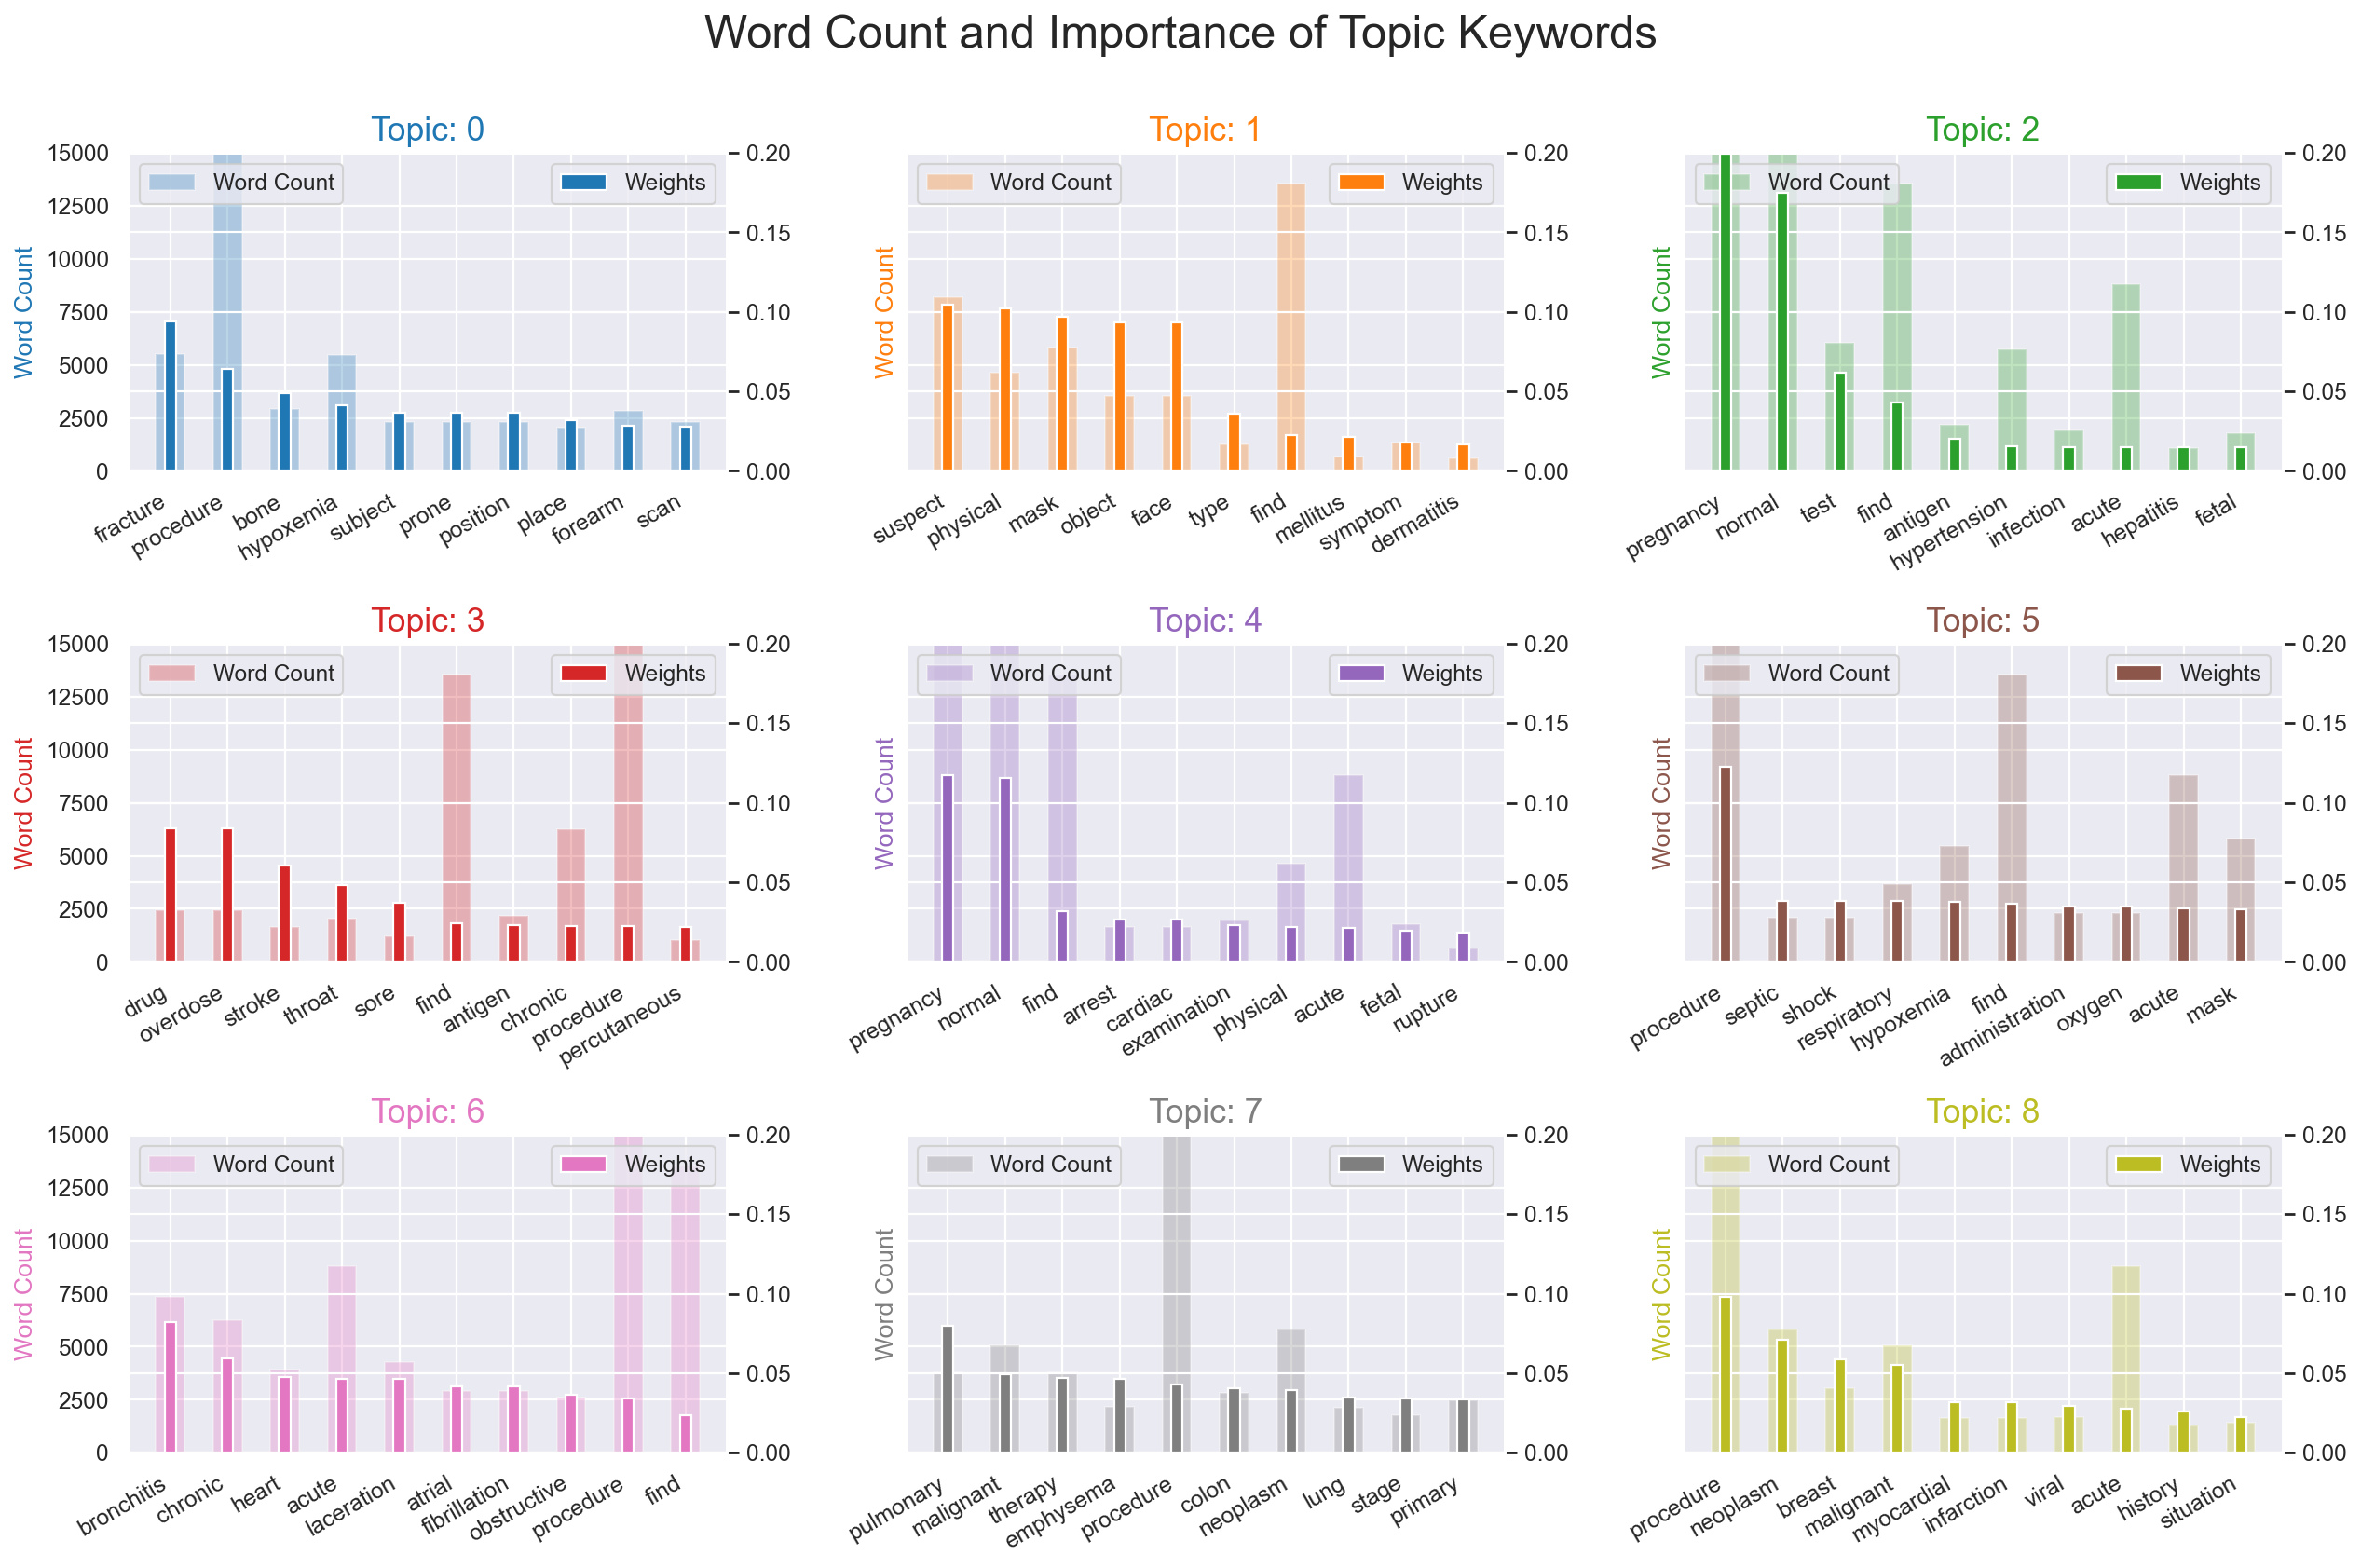

In [24]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in mitre['tokens'] for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 3, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.2); ax.set_ylim(0, 15000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [17]:
# Compute Perplexity Score
print('nPerplexity Score: ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=mitre['tokens'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('nCoherence Score: ', coherence_lda)

nPerplexity Score:  -4.723945923928708
nCoherence Score:  0.31673090685465694


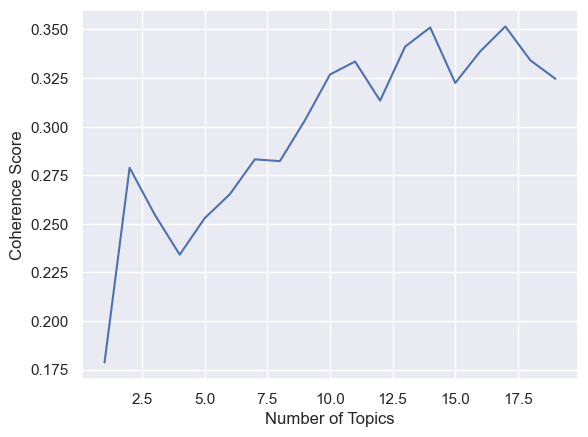

In [26]:
# Calculating Coherence score using C_v:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = mitre['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [22]:
# supporting function  
def compute_coherence_values(corpus, dictionary, k, a, b):      
    lda_model = gensim.models.LdaMulticore(corpus=corpus,  
                                           id2word=dictionary,  
                                           num_topics=k,   
                                           random_state=100,  
                                           chunksize=100,  
                                           passes=10,  
                                           alpha=a,  
                                           eta=b,  
                                           per_word_topics=True)  
      
    coherence_model_lda = CoherenceModel(model=lda_model, texts=mitre['tokens'], dictionary=dictionary, coherence='c_v')  
      
    return coherence_model_lda.get_coherence()  

In [20]:
import gensim
from gensim.utils import simple_preprocess

In [ ]:
# Prepare the data for drawing chart  
target_alpha = 0.01  
target_beta = 0.01  
topic_nums = list(range(2, 11))  
target_co_pos_set = set()  
for i, t in enumerate(zip(model_results['Alpha'], model_results['Beta'])):  
    if t[0] == target_alpha and t[1] == target_beta:  
        target_co_pos_set.add(i)  
          
coherences = []  
for i, co in enumerate(model_results['Coherence']):  
    if i in target_co_pos_set:  
        coherences.append(co)  
          
for topic_num, coherence in zip(topic_nums, coherences):  
    print("Topic number={} with coherence value={:.02f}".format(topic_num, coherence)) 

In [ ]:
import matplotlib.pyplot as plt  
  
plt.figure(figsize=(10, 6), dpi=100, linewidth = 2)  
plt.plot(topic_nums, coherences, 's-', color = 'r', label="Coherence score (alpha=0.01 beta=0.1)")  
plt.title("Topic Coherence: Determining optimal topic number", x=0.5, y=1.03)  
plt.xticks(fontsize=7)  
plt.yticks(fontsize=7)  
plt.xlabel("Number of topic", fontsize=10, labelpad = 15)  
plt.ylabel("Coherence score", fontsize=10, labelpad = 20)  
  
plt.legend(loc = "best", fontsize=10)  
plt.show() 

In [ ]:
target_topic_num = 5  
target_collection = []  
for k, a, b, c in zip(model_results['Topics'], model_results['Alpha'], model_results['Beta'], model_results['Coherence']):  
    if k == target_topic_num:  
        target_collection.append((a, b, c))  
          
target_collection = sorted(target_collection, key=lambda t: t[2], reverse=True)  
target_collection[:10] 



In [ ]:
best_co = target_collection[0][2]  
improve_pert = (best_co - coherence_lda) * 100 / coherence_lda  
print("Coherence score is improved by {:.01f}%".format(improve_pert)) 

In [79]:
num_topics = 10


In [80]:
# Printing the topics
lda_model.print_topics(-1)

[(0,
  '0.114*"colon" + 0.099*"malignant" + 0.081*"cardiac" + 0.081*"arrest" + 0.059*"neoplasm" + 0.044*"tumor" + 0.043*"history" + 0.040*"overlap" + 0.037*"concussion" + 0.036*"loss"'),
 (1,
  '0.127*"disease" + 0.119*"alzheimer" + 0.080*"depression" + 0.053*"seizure" + 0.051*"single" + 0.049*"major" + 0.049*"situation" + 0.040*"labor" + 0.039*"history" + 0.030*"suspect"'),
 (2,
  '0.128*"polyp" + 0.101*"colon" + 0.074*"rectal" + 0.072*"allergic" + 0.071*"rhinitis" + 0.067*"perennial" + 0.044*"seasonal" + 0.042*"sepsis" + 0.042*"cause" + 0.042*"polypectomy"'),
 (3,
  '0.092*"acute" + 0.076*"procedure" + 0.061*"bronchitis" + 0.061*"throat" + 0.052*"stroke" + 0.048*"viral" + 0.047*"prostate" + 0.037*"neoplasm" + 0.034*"sore" + 0.030*"pharyngitis"'),
 (4,
  '0.124*"procedure" + 0.081*"hypoxemia" + 0.076*"administration" + 0.076*"oxygen" + 0.075*"mask" + 0.058*"endotracheal" + 0.058*"tube" + 0.057*"insertion" + 0.041*"septic" + 0.041*"shock"'),
 (5,
  '0.255*"pregnancy" + 0.179*"normal" +